# Test Bubbles

presentation of hierarchical data https://python-graph-gallery.com/circular-packing-several-levels-of-hierarchy

In [129]:
import numpy as np
import circlify
import matplotlib.pyplot as plt


def draw_bubbles(a, selectors = ['RCP','GCM']):

##############################
# Erstellen der Struktur für das circlelize package - geht bestimmt viel einfacher und eleganter und für mehr Ebenen.

# Die Struktur wird z.B. auch in einem pandas multi-Index gut wieder gegeben, aber wie überführt man die in die hierarische Liste???
#tab = a.groupby(['RCP','GCM','RCM','ensemble','institute']).size()
#tab

    levels = len(selectors)
    
    
    data = [{'id': 'climate', 'datum': a.shape[0]}]

    z = 0
    b = a[selectors[z]].unique()
    listed = []
    for bb in b : listed = np.append(listed,{'id' : bb, 'datum' : a.groupby([selectors[z]]).size()[bb]})
    data[0]['children'] = list(listed)

    if levels >1:

        for bb in data[0]['children']:
            z = 1
            ax = a[a[selectors[z-1]]==bb['id']]
            bx = ax[selectors[z]].unique()
            listed = []
            for bbx in bx : listed = np.append(listed,{'id' : bbx, 'datum' : ax.groupby([selectors[z]]).size()[bbx]})
            bb['children'] = list(listed)

            if levels >2:
                for cc in bb['children']:
                    cx = ax[ax[selectors[z]]==cc['id']]
                    ccx = cx[selectors[z+1]].unique()
                    listedc = []
                    for cccx in ccx : listedc = np.append(listedc,{'id' : cccx, 'datum' : ax.groupby([selectors[z+1]]).size()[cccx]})
                    cc['children'] = list(listedc)


####################
# Berechnen der Kreisgeometrien

    # Compute circle positions thanks to the circlify() function
    circles = circlify.circlify(
        data, 
        show_enclosure=False, 
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )
        
#################### 
# eigentliches Erstellen des Circle Plots
    # import libraries

    # Create just a figure and only one subplot
    fig, ax = plt.subplots(figsize=(14,14))

    # Title
    ax.set_title('Repartition of the climate predictions')

    # Remove axes
    ax.axis('off')

    # Find axis boundaries
    lim = max(
        max(
            abs(circle.x) + circle.r,
            abs(circle.y) + circle.r,
        )
        for circle in circles
    )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    # Print circle the highest level:
    for circle in circles:
        if circle.level != 2:
          continue
        x, y, r = circle
        ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="lightblue"))

    # Print circle and labels for the highest level:
    for circle in circles:
        if circle.level != 3:
          continue
        x, y, r = circle
        label = circle.ex["id"]
        ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="darkblue"))
        plt.annotate(label, (x,y ), ha='center', color="white")

    # Print circle and labels for the lowest level:
    for circle in circles:
        if circle.level != 4:
          continue
        x, y, r = circle
        label = circle.ex["id"]
        ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#69b3a2"))
        plt.annotate(label, (x,y ), ha='center', color="white")

    # Print labels for the highest level:
    for circle in circles:
        if circle.level != 2:
          continue
        x, y, r = circle
        label = circle.ex["id"]
        plt.annotate(label, (x,y-0.05 ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))


In [145]:
import pandas as pd
a = pd.read_csv('key_list.csv')
a

,checkPrec,EToPM_ok,EToPM2_ok,EToHG_ok,bias_ok,GCM,RCM,ensemble,RCP,institute
0,True,True,True,True,True,M-MPI-ESM-LR,COSMO-crCLIM-v1-1,r1i1p1,rcp85,CLMcom-ETH
1,True,True,True,True,True,M-MPI-ESM-LR,COSMO-crCLIM-v1-1,r2i1p1,rcp85,CLMcom-ETH
2,True,True,True,True,True,M-MPI-ESM-LR,COSMO-crCLIM-v1-1,r3i1p1,rcp85,CLMcom-ETH
3,False,True,True,True,True,NorESM1-M,COSMO-crCLIM-v1-1,r1i1p1,rcp85,CLMcom-ETH
4,True,True,True,True,True,CERFACS-CNRM-CM5,CCLM4-8-17,r1i1p1,rcp45,CLMcom
...,...,...,...,...,...,...,...,...,...,...
256,False,False,False,False,True,M-MPI-ESM-LR,EPISODES2018,r3i1p1,rcp85,DWD
257,False,False,False,False,True,NorESM1-M,EPISODES2018,r1i1p1,historical,DWD
258,False,False,False,False,True,NorESM1-M,EPISODES2018,r1i1p1,rcp26,DWD
259,False,False,False,False,True,NorESM1-M,EPISODES2018,r1i1p1,rcp45,DWD


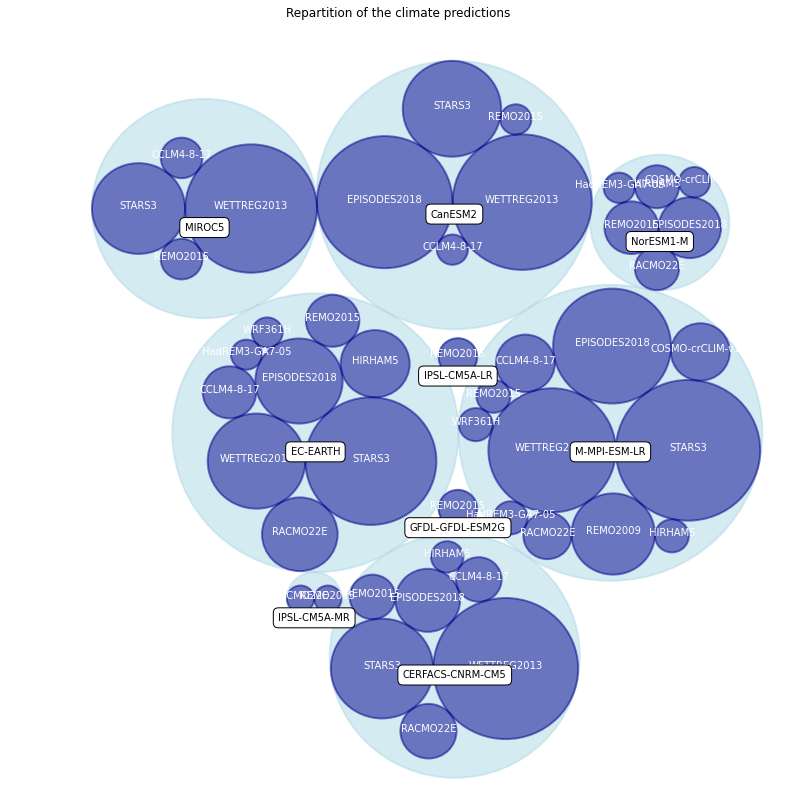

In [146]:
draw_bubbles(a, selectors = ['GCM','RCM'])